## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [2]:
train = np.loadtxt('../datasets/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('../datasets/test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

## Визуализируем исходные данные

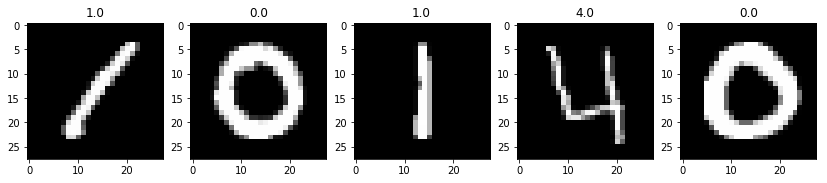

In [4]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Очищаем исходные данные

In [5]:
tstimg = train_img[0].copy()

In [6]:
tstimg = cv2.GaussianBlur(tstimg,ksize=(3,3),sigmaX =1)

In [7]:
tstimg.shape

(28, 28)

In [8]:
for i,img in enumerate(train_img):
    train_img[i] = cv2.GaussianBlur(img,ksize=(5,5),sigmaX =2.5)

In [9]:
for i,img in enumerate(test_img):
    test_img[i] = cv2.GaussianBlur(img,ksize=(5,5),sigmaX =2.5)

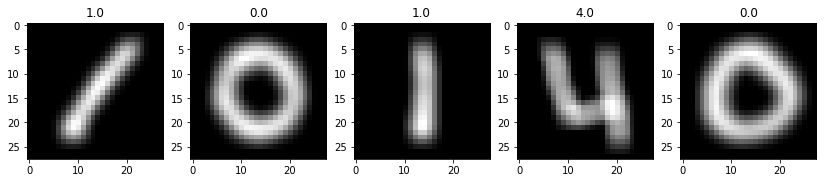

In [10]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);


## Вычисляем X и Y составляющие градиента с помощью оператора Собеля

In [11]:
train_sobel_x = np.zeros_like(train_img)
train_sobel_y = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

In [12]:
test_sobel_x = np.zeros_like(test_img)
test_sobel_y = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

## Вычисляем угол и длину вектора градиента

In [13]:
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)

In [14]:
test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)

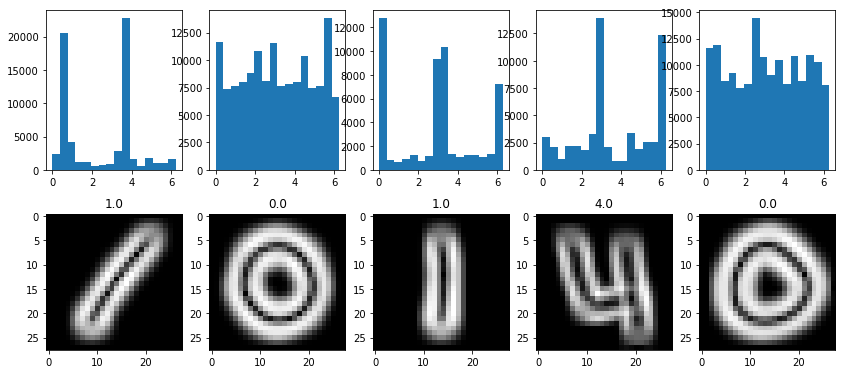

In [15]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_g[:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_theta[i - 1].flatten(),
             bins=16, weights=train_g[i - 1].flatten())

## Вычисляем гистограммы градиентов

In [16]:
train_theta[np.nonzero(train_theta>np.pi)].shape

(8870361,)

In [17]:
# Гистограммы вычисляются с учетом длины вектора градиента
train_hist = np.zeros((len(train_img), 64))
for i in range(len(train_img)):
    hist_up_r, borders_up_r = np.histogram(train_theta[i][:14,:14],
                                 bins=16,
                                 range=(0.,  2*np.pi),
                                 weights=train_g[i][0:14,:14])
    hist_down_r, borders_down_r = np.histogram(train_theta[i][14:,:14],
                                 bins=16,
                                 range=(0.,  2*np.pi),
                                 weights=train_g[i][14:,:14])    
    hist_up_l, borders_up_l = np.histogram(train_theta[i][:14,14:],
                                 bins=16,
                                 range=(0.,  2*np.pi),
                                 weights=train_g[i][0:14,14:])
    hist_down_l, borders_down_l = np.histogram(train_theta[i][14:,14:],
                                 bins=16,
                                 range=(0.,  2*np.pi),
                                 weights=train_g[i][14:,14:])       
#     n=np.argmax(hist)
#     hist=list(hist)
#     train_hist[i] = np.array(hist[n:] + hist[:n])  # циклический сдвиг
    train_hist[i] = np.hstack([hist_up_r, hist_down_r,hist_up_l, hist_down_l])   

In [18]:
test_hist = np.zeros((len(test_img), 64))
for i in range(len(test_img)):
    hist_up_r, borders_up_r = np.histogram(test_theta[i][:14,:14],
                                 bins=16,
                                 range=(0., 2*np.pi),
                                 weights=test_g[i][:14,:14])
    hist_down_r, borders_down_r = np.histogram(test_theta[i][14:,:14],
                                 bins=16,
                                 range=(0., 2*np.pi),
                                 weights=test_g[i][14:,:14])    
    hist_up_l, borders_up_l = np.histogram(test_theta[i][:14,14:],
                                 bins=16,
                                 range=(0., 2*np.pi),
                                 weights=test_g[i][:14,14:])
    hist_down_l, borders_down_l = np.histogram(test_theta[i][14:,14:],
                                 bins=16,
                                 range=(0., 2*np.pi),
                                 weights=test_g[i][14:,14:])        
#     n=np.argmax(hist)
#     hist=list(hist)
#     test_hist[i] = np.array(hist[n:] + hist[:n])  # циклический сдвиг
    test_hist[i] = np.hstack([hist_up_r, hist_down_r,hist_up_l, hist_down_l])   

## Нормируем вектор гистограммы (без нормировки получается лучше, убрал)

## Разбиваем выборку на обучение и валидацию

In [19]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_hist, test_size=0.2, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfclf= RandomForestClassifier(n_estimators=200)

In [40]:
rfclf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [41]:
pred_val2=rfclf.predict(x_val)

In [42]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val2))

Accuracy: 0.960952380952


In [43]:
rfclf.fit(train_hist, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Вычисляем центроиды каждого из 9 классов

In [21]:
centroids = np.zeros((10, train_hist.shape[1]), dtype=np.float32)

In [22]:
for i in range(10):
    centroids[i] = np.mean(x_train[y_train == i], axis=0)

## Находим ближайший центройд для валидации

In [23]:
pred_val = np.zeros_like(y_val)
for i in range(len(y_val)):
    distances = np.linalg.norm(centroids - x_val[i], axis=1)
    pred_val[i] = np.argmin(distances)

## Оцениваем качество решение на валидационной выборке

In [24]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.810119047619


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

             precision    recall  f1-score   support

        0.0       0.92      0.87      0.89       816
        1.0       0.84      0.93      0.88       909
        2.0       0.89      0.81      0.85       846
        3.0       0.68      0.82      0.74       937
        4.0       0.88      0.74      0.80       839
        5.0       0.86      0.81      0.83       702
        6.0       0.82      0.84      0.83       785
        7.0       0.87      0.76      0.81       893
        8.0       0.70      0.76      0.73       835
        9.0       0.75      0.76      0.75       838

avg / total       0.82      0.81      0.81      8400



In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[706   4   5  18  15  11  20   1  12  24]
 [  0 848   4   2   6   0   7  13  26   3]
 [  2   9 682  99   4   5  10   7  21   7]
 [  2   6  23 771   7  32   1   4  72  19]
 [  8  23   3  20 621   0  64   5  28  67]
 [  2   0   2  86   2 566  18   0  23   3]
 [ 23  29   2   1  28  15 659   0  27   1]
 [  2  46  32  30   1   2   2 675  36  67]
 [ 13  31  10  52  11  22  26   6 638  26]
 [ 11  19   1  60  13   2   0  68  25 639]]


## Предсказания на тестовыйх данных

In [27]:
pred_test = np.zeros(len(test_img), np.uint8)
for i in range(len(test_img)):
    distances = np.linalg.norm(centroids - test_hist[i], axis=1)
    pred_test[i] = np.argmin(distances)

In [44]:
pred_test2 = rfclf.predict(test_hist)

## Визуализируем предсказания

In [28]:
import pandas as pd

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011601400>]], dtype=object)

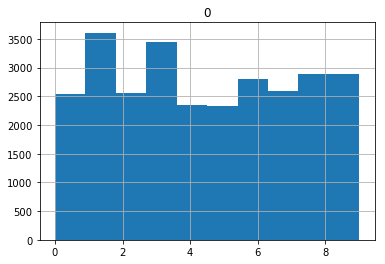

In [29]:
pd.DataFrame(pred_test).hist()

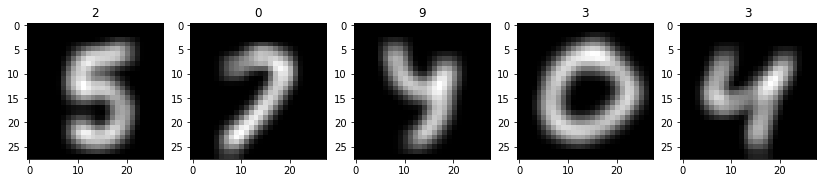

In [30]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[10:15], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

In [31]:
centroids[0]

array([ 2652.12451172,  7208.96289062,  4577.5078125 ,  1430.67956543,
         319.43780518,    59.65763092,    29.80233765,    92.20656586,
         802.54351807,  2143.50048828,  1542.64257812,   514.83599854,
         177.52984619,    69.11431122,    58.79998016,   271.6803894 ,
        3701.88916016,  1193.30310059,   334.79150391,  1077.86523438,
        1260.06481934,  1310.32421875,  1311.47021484,  1428.67614746,
        1859.41455078,  1467.03198242,   628.82147217,  2428.00805664,
        3406.28173828,  3170.11987305,  3245.16821289,  3808.90722656,
         845.6552124 ,   432.36386108,  1274.60742188,  2312.48095703,
        3153.06713867,  3645.76928711,  4367.50244141,  4146.09570312,
        1903.87475586,   761.7354126 ,  1400.90185547,  1400.23461914,
        1377.55102539,  1411.8770752 ,  1480.91247559,  1306.18676758,
        1417.08337402,  2522.58105469,  2726.37133789,  1370.14123535,
         315.4727478 ,    61.29064941,    59.56671906,   664.40710449,
      

## Готовим файл для отправки

In [34]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, p)) # 0.837

In [24]:
# Your submission scored 0.41700

In [45]:
with open('submit_rf.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test2, 1):
        dst.write('%s,%s\n' % (i, p))  

In [ ]:
# ubmission scored on kaggle 0.96